In [1]:
# dataset: Salary_Data.csv
# location: https://mitu.co.in/dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datasets/Salary_Data.csv')

In [5]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


##### Separate the input and output data

In [7]:
x = df[['YearsExperience']] # input
y = df['Salary']  # output

In [9]:
df.shape

(30, 2)

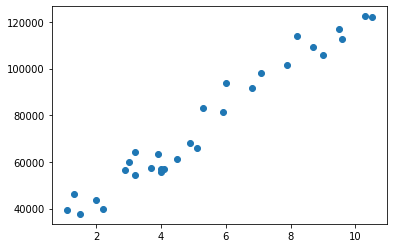

In [10]:
plt.scatter(x, y)

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


##### cross-validation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [15]:
x_train.shape

(22, 1)

In [16]:
x_test.shape

(8, 1)

##### build the model

In [18]:
# import the class
from sklearn.linear_model import LinearRegression

In [19]:
# create the object
regressor = LinearRegression()

In [20]:
# train the model with data
regressor.fit(x_train, y_train)

LinearRegression()

In [21]:
# m
regressor.coef_

array([9379.71049195])

In [22]:
# c
regressor.intercept_

26986.691316737248

In [23]:
regressor.predict([[12]])

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [24]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


In [25]:
y_pred = regressor.predict(x_test)

In [26]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [27]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [28]:
result

,actual,predicted
2,37731,41056.257055
28,122391,123597.709384
13,57081,65443.504334
10,63218,63567.562235
26,116969,116093.940990
24,109431,108590.172597
27,112635,117031.912039
11,55794,64505.533285


In [31]:
np.mean(abs(y_test - y_pred))

3508.5455930660555

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [33]:
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [34]:
mean_absolute_percentage_error(y_test, y_pred)

0.05754512646779697

In [35]:
y_pred = regressor.predict(x)

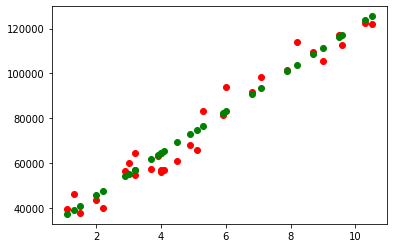

In [40]:
plt.scatter(x,y, color='r')
plt.scatter(x, list(y_pred), color='g')

In [41]:
regressor.score(x,y)

0.955975487542377